Target file : final_result_EMBA_47.csv
Detector : EMB, Side : A, LATOME ID : 47
Target file : final_result_EMBA_48.csv
Detector : EMB, Side : A, LATOME ID : 48
Target file : final_result_EMBA_50.csv
Detector : EMB, Side : A, LATOME ID : 50
Target file : final_result_EMBA_95.csv
Detector : EMB, Side : A, LATOME ID : 95
Target file : final_result_EMBA_96.csv
Detector : EMB, Side : A, LATOME ID : 96
Target file : final_result_EMBA_97.csv
Detector : EMB, Side : A, LATOME ID : 97
Target file : final_result_EMBA_98.csv
Detector : EMB, Side : A, LATOME ID : 98
Target file : final_result_EMECA_49.csv
Detector : EMEC, Side : A, LATOME ID : 49


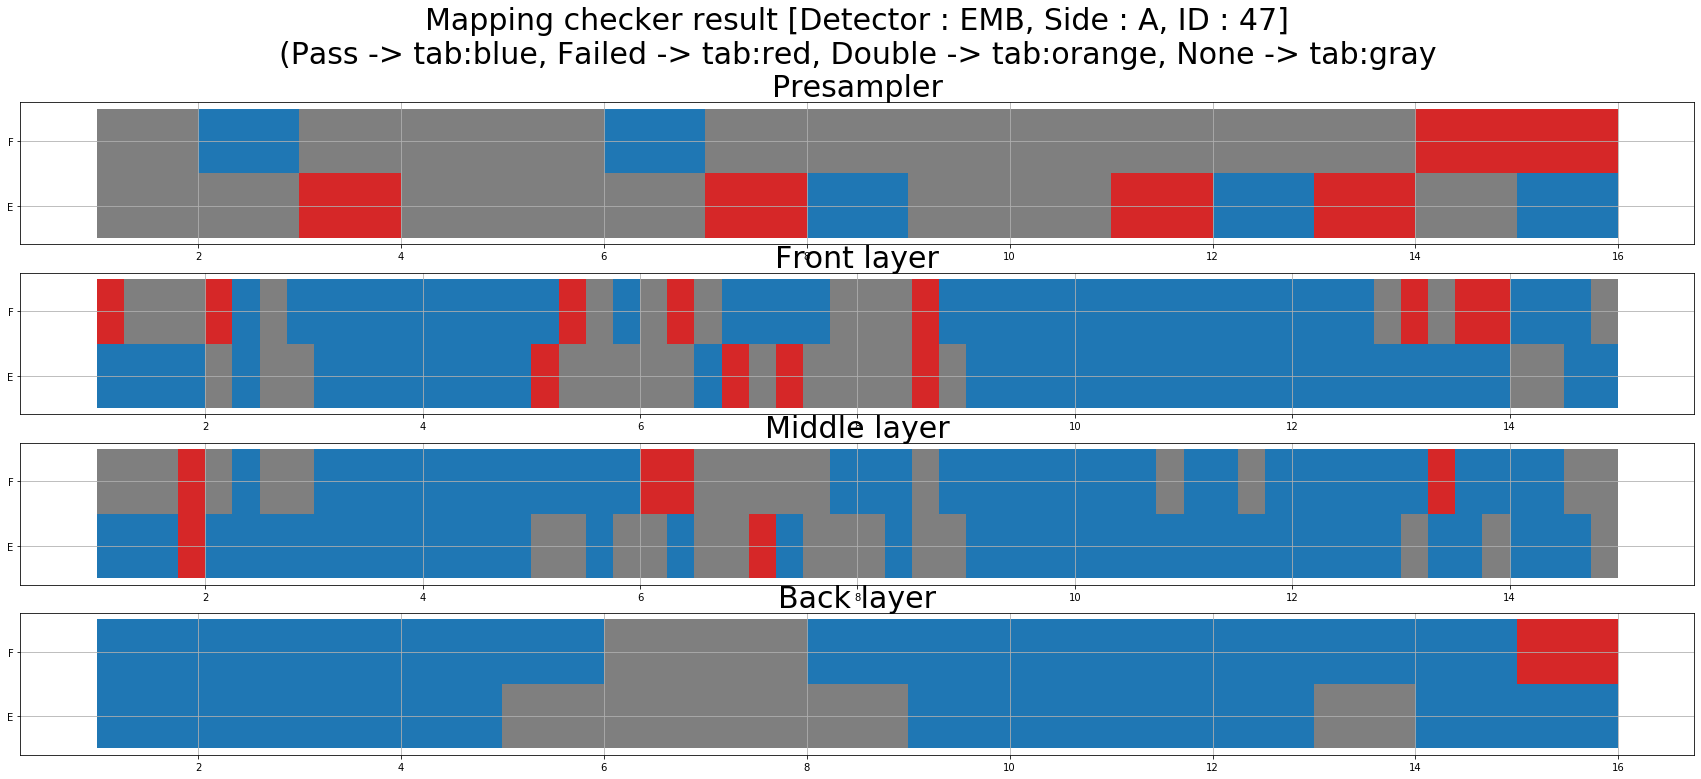

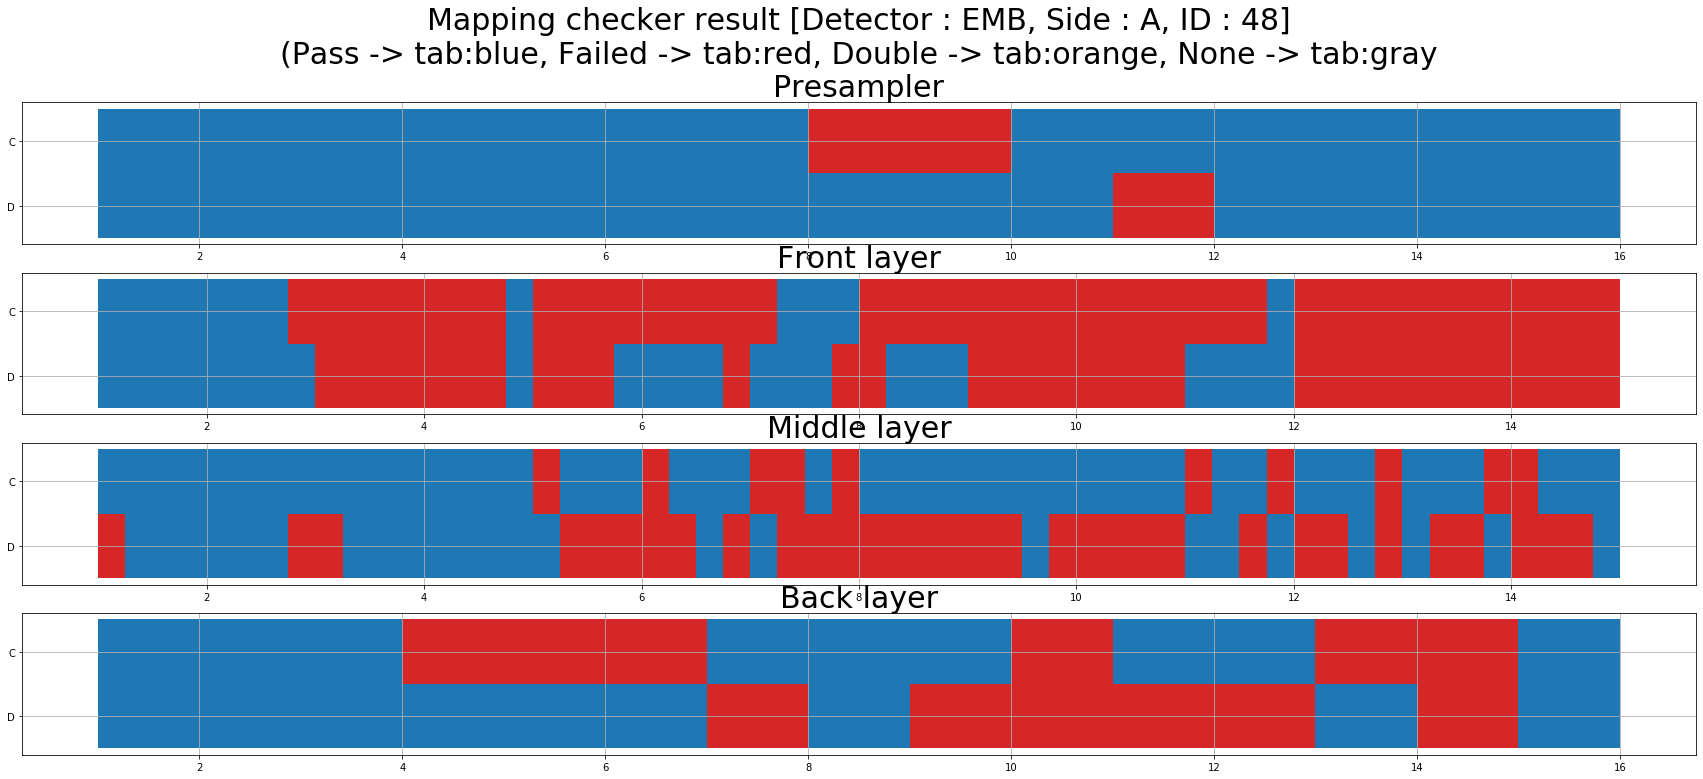

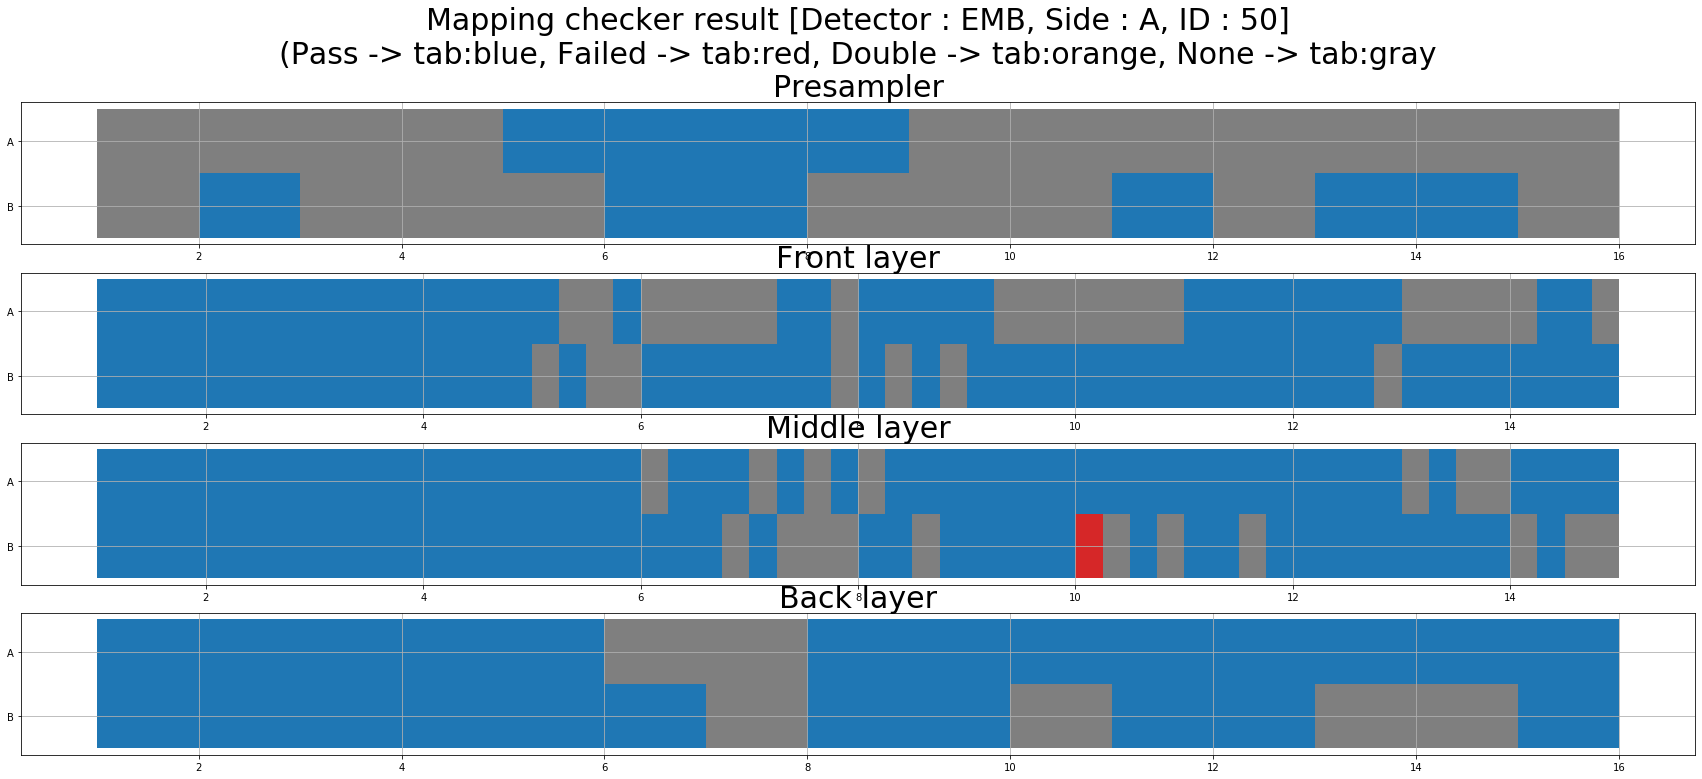

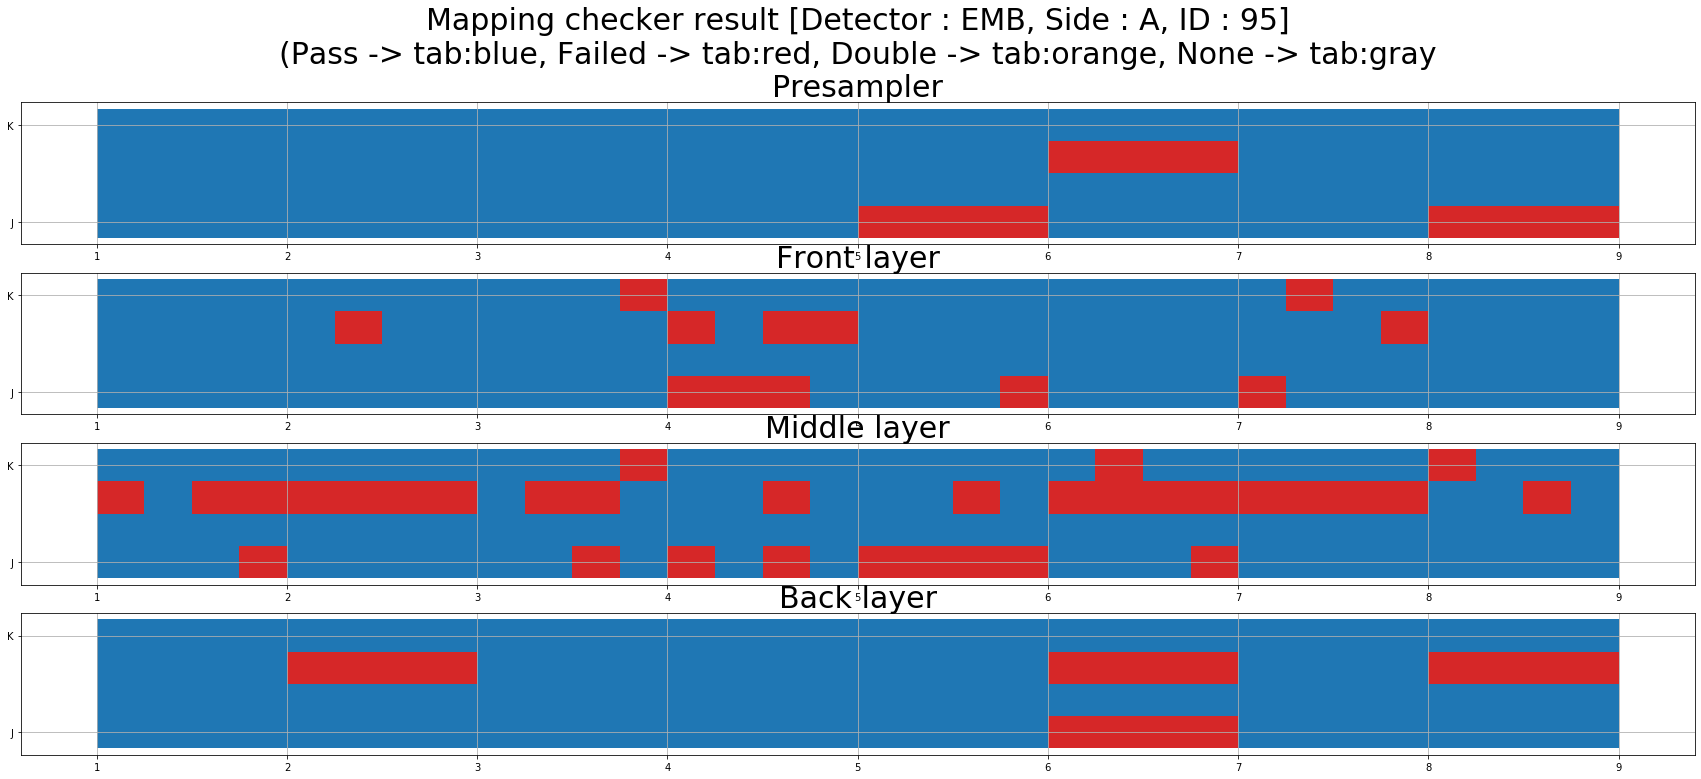

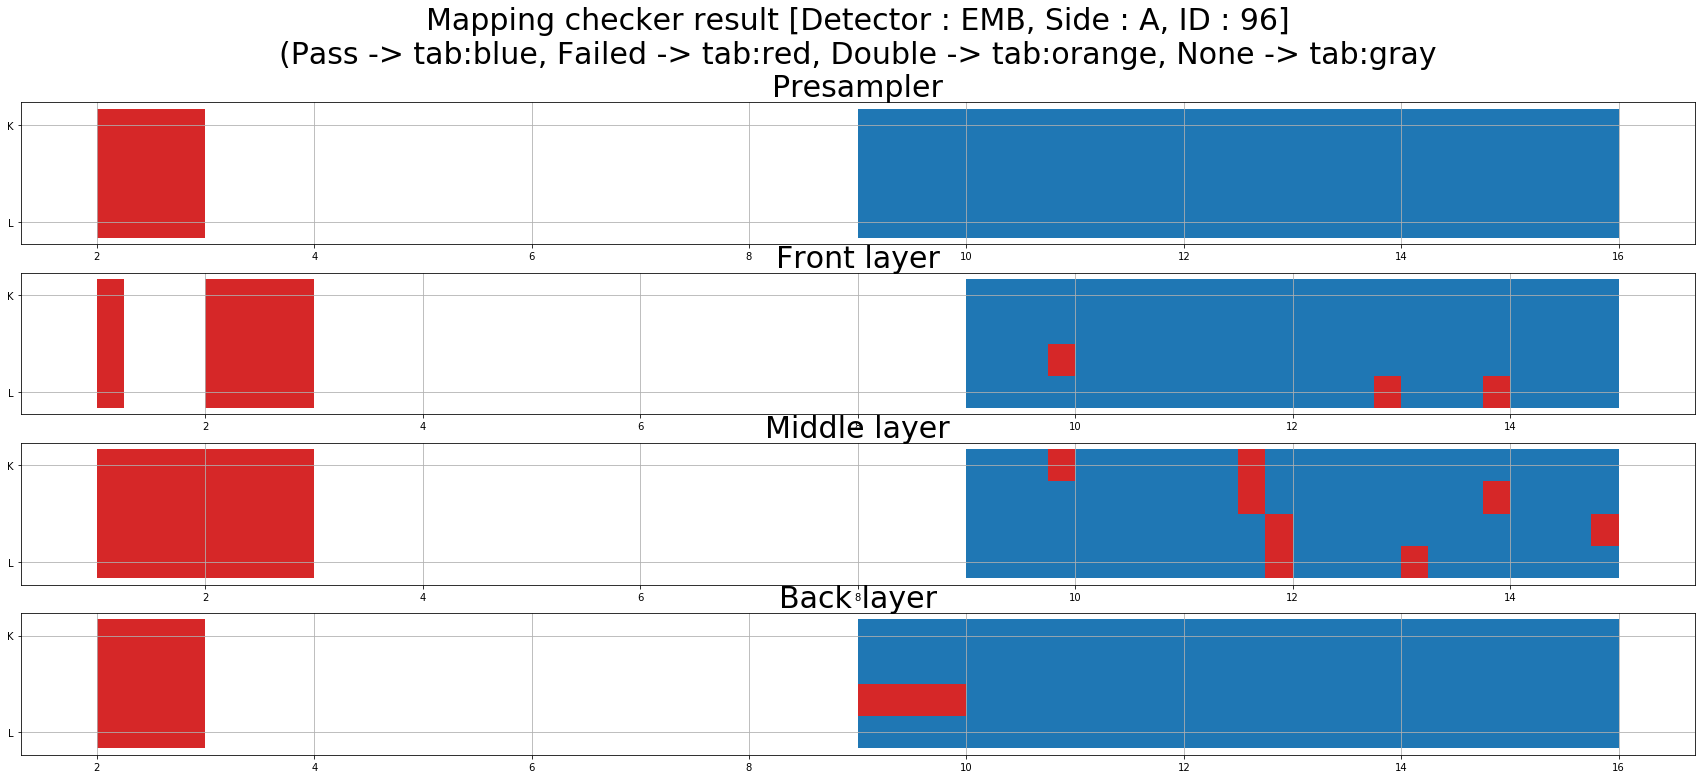

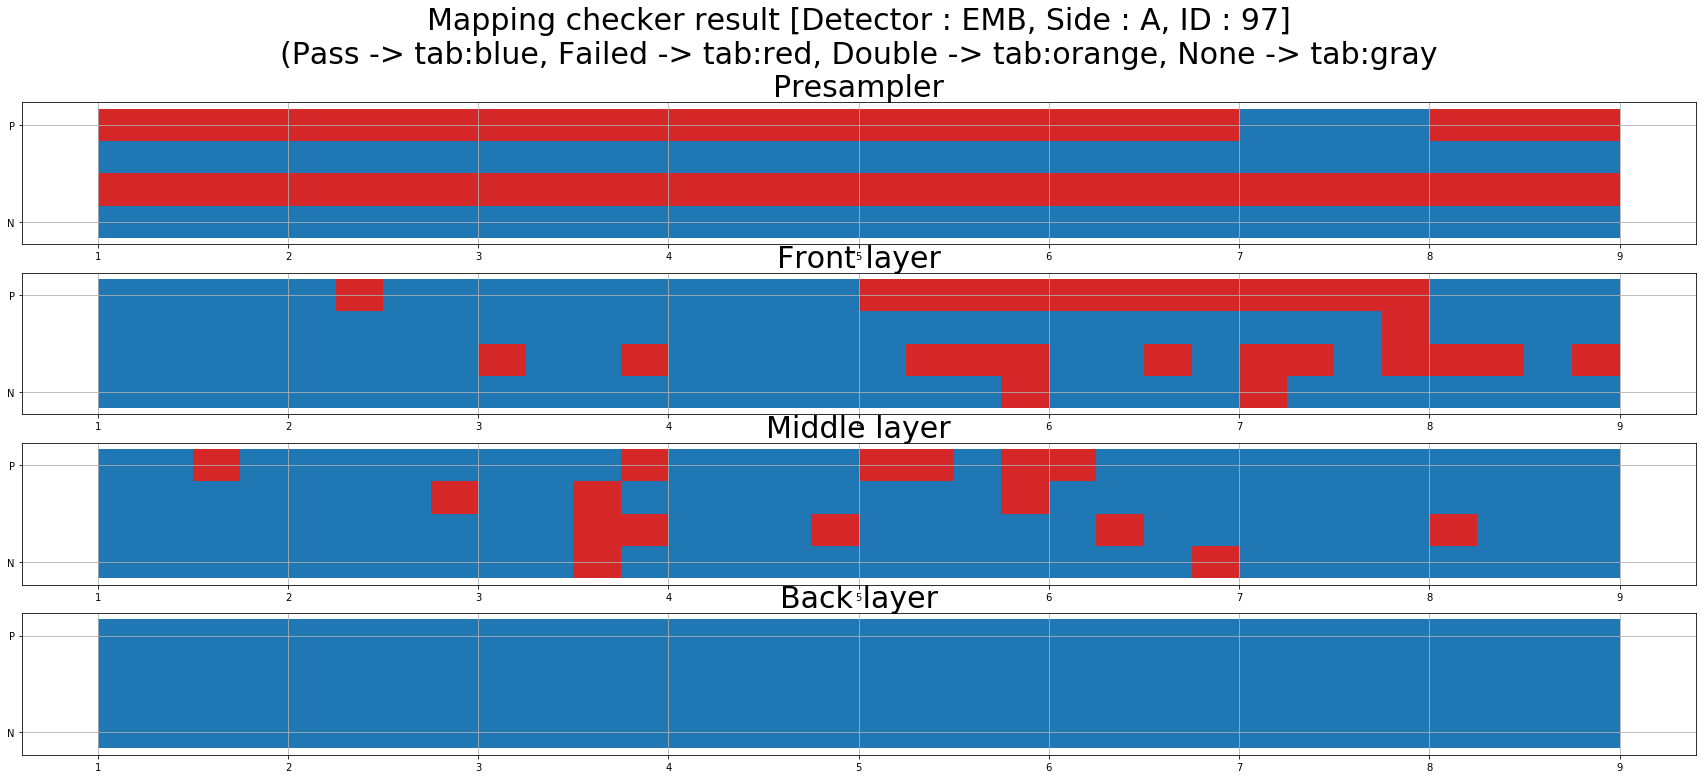

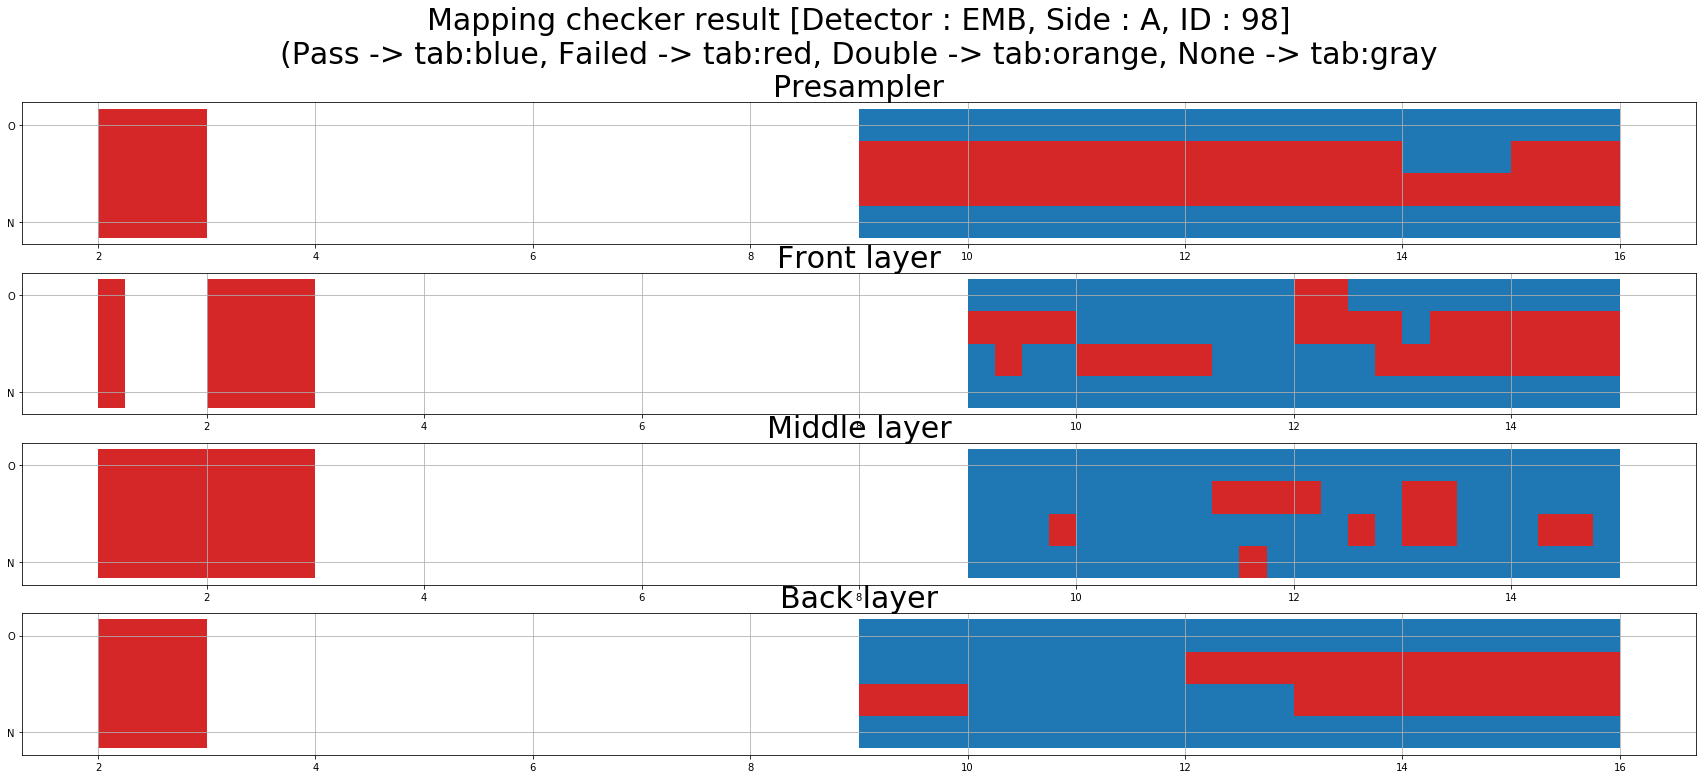

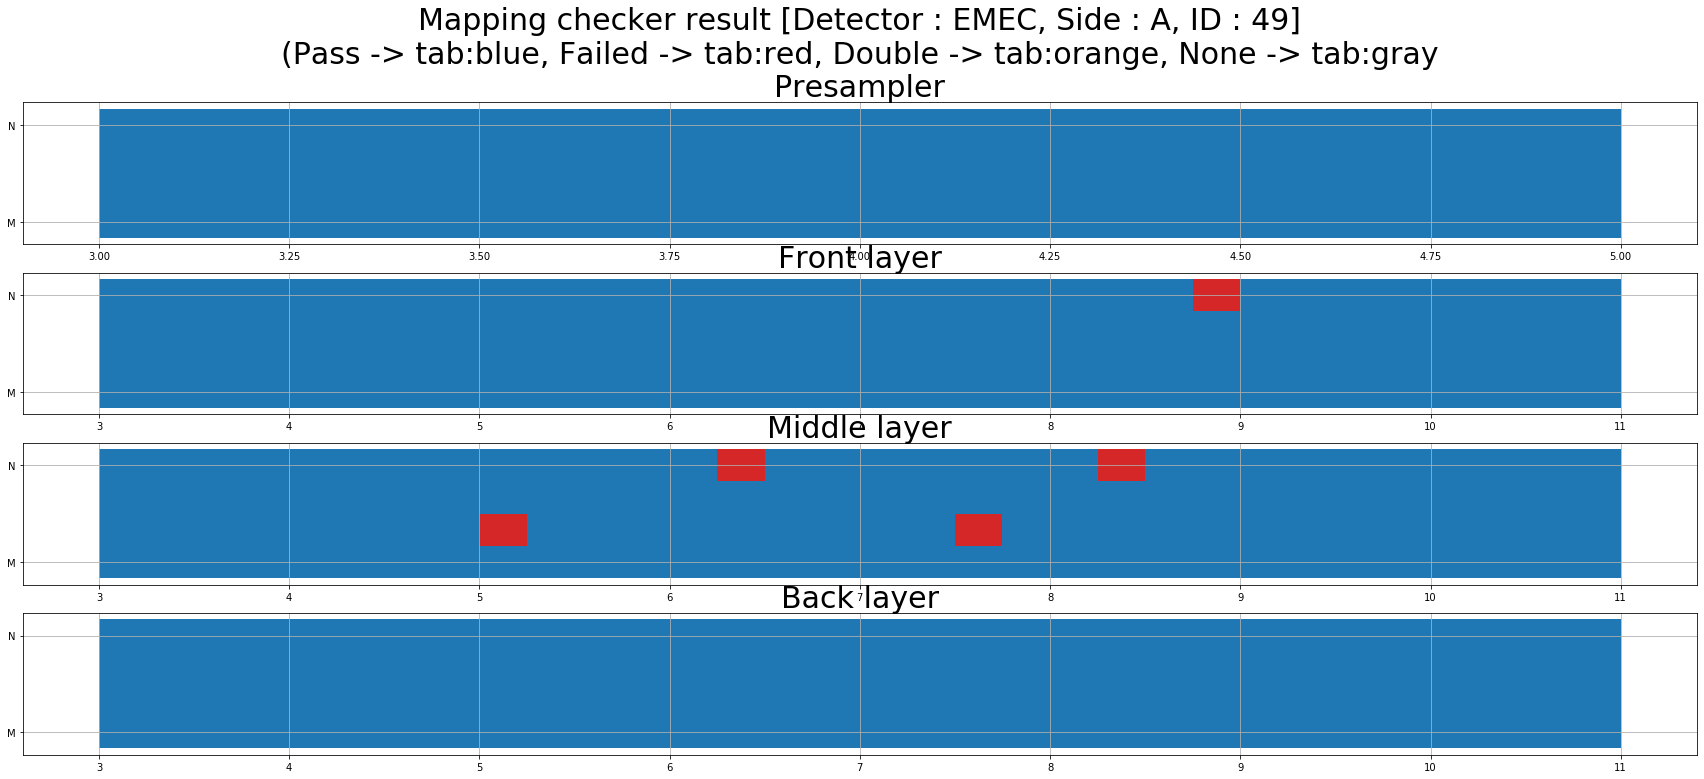

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
import re
import sys
import subprocess

file_path = '../Mapping_checker_analysis/result/scp/'
command = 'ls %s' % file_path
process_out = subprocess.Popen(command.split(), stdout=subprocess.PIPE).communicate()
process_out = process_out[0].decode('utf-8').split('\n')

#####  DISPLAY CONFIGURATION #################
display_target = 'UC'
display_target = 'ETA-PHI'
color_tab      = {'pass': 'tab:blue', 'failed': 'tab:red', 'double': 'tab:orange', 'none': 'tab:gray'}
###########################################

for file in process_out[0:len(process_out) - 1]:
# for file in process_out:
    result_row = []
    if not file == '':
        print('Target file : %s' % file)                                                                                                                                                                                                                    
        with open(file_path + file) as f:
            reader = csv.reader(f)
            for row in reader:
                result_row.append(row)
            # Extract LATOME ID, Detector, Side                                                                                                                                                                                                               
            detector  = result_row[0][0].split()[1].split(':')[1]
            side      = result_row[0][0].split()[2].split(':')[1]
            latome_id = result_row[0][0].split()[3].split(':')[1]
            print('Detector : %s, Side : %s, LATOME ID : %s' % (detector, side, latome_id))

    result_dict = {}
    result_dict_inner = {}

    for index in range(3, len(result_row)):
        result_dict_inner['eta'] = None
        result_dict_inner['phi'] = None
        result_dict_inner['layer'] = None
        result_dict_inner['layer_eta'] = None
        result_dict_inner['span'] = None
        result_dict_inner['stream_in_UC'] = None
        result_dict_inner['scid_in_UC'] = None
        result_dict_inner['result'] = None
        # Check target supercell name                                                                                                                                                                                                                         
        target_supercell           = result_row[index][0]
        target_supercell_regex = re.search(r'(?P<eta>[0-9]+)(?P<phi>[A-Z]+)_(?P<layer>[PFMB]+)(?P<layer_eta>[0-9]+)', target_supercell)
        # Check ohi                                                                                                                                                                                                                                           
        result_dict_inner['phi']   = target_supercell_regex.group('phi')
        # Check eta                                                                                                                                                                                                                                           
        result_dict_inner['eta']   = target_supercell_regex.group('eta')
        # Check layer, layer size, span                                                                                                                                                                                                                       
        if target_supercell_regex.group('layer') == 'P':
            result_dict_inner['layer']       = target_supercell_regex.group('layer')
            result_dict_inner['layer_eta'] = 0
            result_dict_inner['span']       = 1
        if target_supercell_regex.group('layer') == 'F':
            result_dict_inner['layer']      = target_supercell_regex.group('layer')
            result_dict_inner['layer_eta'] = 0.25 * (int(target_supercell_regex.group('layer_eta')) - 1)
            result_dict_inner['span']       = 0.25
        if target_supercell_regex.group('layer') == 'M':
            result_dict_inner['layer']       = target_supercell_regex.group('layer')
            result_dict_inner['layer_eta'] = 0.25 * (int(target_supercell_regex.group('layer_eta')) - 1)
            result_dict_inner['span']       = 0.25
        if target_supercell_regex.group('layer') == 'B':
            result_dict_inner['layer']       = target_supercell_regex.group('layer')
            result_dict_inner['layer_eta'] = 0
            result_dict_inner['span']       = 1
        # Check stream id, scid in UserCode                                                                                                                                                                                                                   
        result_dict_inner['stream_in_UC']  = result_row[index][2]
        result_dict_inner['scid_in_UC']    = result_row[index][3]
        # Check result                                                                                                                                                                                                                                        
        if result_row[index][len(result_row[index]) - 1] == 'DOUBLE_TALK':
            result_dict_inner['result'] = 'double'
        elif result_row[index][len(result_row[index]) - 1] == 'FAILED':
            if result_row[index][1] == 'None':
                result_dict_inner['result'] = 'none'
            else:
                result_dict_inner['result'] = 'failed'
        elif result_row[index][len(result_row[index]) - 1] == 'PASS':
            result_dict_inner['result'] = 'pass'

        # Dump information to result_dict                                                                                                                                                                                                                     
        if not target_supercell in result_dict:
            result_dict[target_supercell] = []
            result_dict[target_supercell].append(result_dict_inner.copy())
        else:
            result_dict[target_supercell].append(result_dict_inner.copy())
            
    # Graphic the result                                                                                                                                                                                                                                      
    if display_target == 'UC':
        graphics_dict = {}
        for type in ['pass', 'failed', 'double', 'none']:
            for scid in range(6):
                class_pass = '%s_%d' % (type, scid)
                graphics_dict[class_pass] = []
                
        # Prepare for graohics
        for cell_name in result_dict:
            for index in range(len(result_dict[cell_name])):
                if not result_dict[cell_name][index]['result'] == 'none':
                    span = (int(result_dict[cell_name][index]['stream_in_UC']), 1)
                    class_name = '%s_%s' % (result_dict[cell_name][index]['result'], result_dict[cell_name][index]['scid_in_UC'])
                    graphics_dict[class_name].append(span)
                    
        # Make region for graphics                                                                                                                                                                                                                            
        plt.figure(figsize=(30, 12))
        plt.title('Mapping checker result [Detector : %s, Side : %s, ID : %s]\n(Pass -> %s, Failed -> %s, Double -> %s, None -> %s)' 
                  % (detector, side, latome_id, color_tab['pass'], color_tab['failed'], color_tab['double'], color_tab['none']), fontsize=30)
        plt.xlabel('UserCode stream', fontsize = 30)
        plt.ylabel('UserCode scid', fontsize = 30)
        plt.xlim(0, 62)
        plt.ylim(0, 6)
        plt.grid(which='both')

        for scid in range(6):
            for type in ['none', 'failed', 'double', 'pass']:
                class_name = '%s_%d' % (type, scid)
                plt.broken_barh(graphics_dict[class_name], (scid, 1), facecolors = color_tab[type])

    # Graphic the result
    if display_target == 'ETA-PHI':
        phi_list_all = []
        for cell_name in result_dict:
            if not result_dict[cell_name][0]['phi'] in phi_list_all:
                phi_list_all.append(result_dict[cell_name][0]['phi'])

        graphics_dict = {}
        for layer in ['P', 'F', 'M', 'B']:
            for type in ['pass', 'failed', 'double', 'none']:
                for phi in phi_list_all:
                    class_pass = '%s_%s_%s' % (type, phi, layer)
                    graphics_dict[class_pass] = []

        # Prepare for graphics
        for cell_name in result_dict:
            for index in range(len(result_dict[cell_name])):
                span = (float(result_dict[cell_name][index]['eta']) + float(result_dict[cell_name][index]['layer_eta']), float(result_dict[cell_name][index]['span']))
                class_name = '%s_%s_%s' % (result_dict[cell_name][index]['result'], result_dict[cell_name][index]['phi'], result_dict[cell_name][index]['layer'])
                graphics_dict[class_name].append(span)

                
        # Make region for graphics
        fig = plt.figure(figsize=(30, 12))
        # Presampler
        ax_P = fig.add_subplot(4, 1, 1)
        ax_P.set_title('Mapping checker result [Detector : %s, Side : %s, ID : %s]\n(Pass -> %s, Failed -> %s, Double -> %s, None -> %s\nPresampler'
                      % (detector, side, latome_id, color_tab['pass'], color_tab['failed'], color_tab['double'], color_tab['none']), fontsize=30)
        # Front layer
        ax_F = fig.add_subplot(4, 1, 2)
        ax_F.set_title('Front layer', fontsize = 30)
        # Middle layer
        ax_M = fig.add_subplot(4, 1, 3)
        ax_M.set_title('Middle layer', fontsize = 30)
        # Back layer
        ax_B = fig.add_subplot(4, 1, 4)
        ax_B.set_title('Back layer', fontsize = 30)
        for ax in [ax_P, ax_F, ax_M, ax_B]:
            ax.grid()
            ax.set_yticks([0.5, len(phi_list_all) - 0.5])
            ax.set_yticklabels(phi_list_all)
            
        for ax in [ax_P, ax_F, ax_M, ax_B]:
            for type in ['none', 'failed', 'double', 'pass']:
                for phi_index in range(len(phi_list_all)):
                    if ax == ax_P:
                        class_pass = '%s_%s_P' % (type, phi_list_all[phi_index])
                    if ax == ax_F:
                        class_pass = '%s_%s_F' % (type, phi_list_all[phi_index])
                    if ax == ax_M:
                        class_pass = '%s_%s_M' % (type, phi_list_all[phi_index])
                    if ax == ax_B:
                        class_pass = '%s_%s_B' % (type, phi_list_all[phi_index])
                    ax.broken_barh(graphics_dict[class_pass], (phi_index, 1), facecolors = color_tab[type])
                
                
    save_file_name = 'picture/result_%s_%s_%s_%s.png' % (display_target, detector, side, latome_id)
    plt.savefig(save_file_name)